### Author: Allan R. Jeeboo 
### Preferred Name: Vyncent S. A. van der Wolvenhuizen 
### Affiliation: Data Science Student at TripleTen 
### Email: vanderwolvenhuizen.vyncent@gmail.com 
### Start Date: 2025-04-18 
### Last Updated: 2025-04-20 18:41

# 1.0 Introduction 

In this project, we'll be analyzing


**Project Workflow**

1. Prepare the data

1.1 Open the files and look into the data.

1.2. Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

1.3. Analyze the features not available in the test set. What are these parameters? What is their type?

1.4. Perform data preprocessing.

2. Analyze the data

2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

2.2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies. 

3. Build the model

3.1. Write a function to calculate the final sMAPE value.

3.2. Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

### 1.1 Data Import and Overview

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


train_df = pd.read_csv('gold_recovery_train.csv') 
test_df = pd.read_csv('gold_recovery_test.csv') 
full_df = pd.read_csv('gold_recovery_full.csv') 

In [2]:
print('Training DataFrame:')
pd.set_option('display.max_columns', None)
display(train_df.head(), f'rows, columns:{train_df.shape}') 
pd.reset_option('display.max_columns')

print('Test DataFrame:')
pd.set_option('display.max_columns', None)
display(test_df.head(), f'rows, columns:{test_df.shape}') 
pd.reset_option('display.max_columns')

print('Full DataFrame:')
pd.set_option('display.max_columns', None)
display(full_df.head(), f'rows, columns:{full_df.shape}')
pd.reset_option('display.max_columns')

Training DataFrame:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

'rows, columns:(16860, 87)'

Test DataFrame:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

'rows, columns:(5856, 53)'

Full DataFrame:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

'rows, columns:(22716, 87)'

In [3]:
print(f'train_df dtypes:\n{train_df.dtypes}\n') 
print(f'test_df dtypes:\n{test_df.dtypes}\n')
print(f'full_df dtypes:\n{full_df.dtypes}\n')

train_df dtypes:
date                                           object
final.output.concentrate_ag                   float64
final.output.concentrate_pb                   float64
final.output.concentrate_sol                  float64
final.output.concentrate_au                   float64
                                               ...   
secondary_cleaner.state.floatbank5_a_level    float64
secondary_cleaner.state.floatbank5_b_air      float64
secondary_cleaner.state.floatbank5_b_level    float64
secondary_cleaner.state.floatbank6_a_air      float64
secondary_cleaner.state.floatbank6_a_level    float64
Length: 87, dtype: object

test_df dtypes:
date                                           object
primary_cleaner.input.sulfate                 float64
primary_cleaner.input.depressant              float64
primary_cleaner.input.feed_size               float64
primary_cleaner.input.xanthate                float64
primary_cleaner.state.floatbank8_a_air        float64
primary_cleaner.state.

In [4]:
pd.set_option('display.max_rows', None)  # Ensure all rows are displayed
print(train_df.dtypes)
pd.reset_option('display.max_rows')  # Reset to default after displaying

date                                                   object
final.output.concentrate_ag                           float64
final.output.concentrate_pb                           float64
final.output.concentrate_sol                          float64
final.output.concentrate_au                           float64
final.output.recovery                                 float64
final.output.tail_ag                                  float64
final.output.tail_pb                                  float64
final.output.tail_sol                                 float64
final.output.tail_au                                  float64
primary_cleaner.input.sulfate                         float64
primary_cleaner.input.depressant                      float64
primary_cleaner.input.feed_size                       float64
primary_cleaner.input.xanthate                        float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.concentrate_pb                 float64
primary_

In [5]:
pd.set_option('display.max_rows', None)  # Ensure all rows are displayed
print(test_df.dtypes)
pd.reset_option('display.max_rows')  # Reset to default after displaying

date                                           object
primary_cleaner.input.sulfate                 float64
primary_cleaner.input.depressant              float64
primary_cleaner.input.feed_size               float64
primary_cleaner.input.xanthate                float64
primary_cleaner.state.floatbank8_a_air        float64
primary_cleaner.state.floatbank8_a_level      float64
primary_cleaner.state.floatbank8_b_air        float64
primary_cleaner.state.floatbank8_b_level      float64
primary_cleaner.state.floatbank8_c_air        float64
primary_cleaner.state.floatbank8_c_level      float64
primary_cleaner.state.floatbank8_d_air        float64
primary_cleaner.state.floatbank8_d_level      float64
rougher.input.feed_ag                         float64
rougher.input.feed_pb                         float64
rougher.input.feed_rate                       float64
rougher.input.feed_size                       float64
rougher.input.feed_sol                        float64
rougher.input.feed_au       

In [6]:
pd.set_option('display.max_rows', None)  # Ensure all rows are displayed
print(full_df.dtypes)
pd.reset_option('display.max_rows')  # Reset to default after displaying

date                                                   object
final.output.concentrate_ag                           float64
final.output.concentrate_pb                           float64
final.output.concentrate_sol                          float64
final.output.concentrate_au                           float64
final.output.recovery                                 float64
final.output.tail_ag                                  float64
final.output.tail_pb                                  float64
final.output.tail_sol                                 float64
final.output.tail_au                                  float64
primary_cleaner.input.sulfate                         float64
primary_cleaner.input.depressant                      float64
primary_cleaner.input.feed_size                       float64
primary_cleaner.input.xanthate                        float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.concentrate_pb                 float64
primary_

### 1.2 Data Description

**Technological process:**

- Rougher feed — raw material
- Rougher additions (or reagent additions) — flotation reagents: Xanthate, Sulphate, Depressant
- Xanthate — promoter or flotation activator;
- Sulphate — sodium sulphide for this particular process;
- Depressant — sodium silicate.
- Rougher process — flotation
- Rougher tails — product residues
- Float banks — flotation unit
- Cleaner process — purification
- Rougher Au — rougher gold concentrate
- Final Au — final gold concentrate


**Parameters of stages:**

- air amount — volume of air
- fluid levels
- feed size — feed particle size
- feed rate
- Feature naming 

**How features are named:**

[stage].[parameter_type].[parameter_name]

Example: rougher.input.feed_ag

**Possible values for [stage]:** 

- rougher — flotation
- primary_cleaner — primary purification
- secondary_cleaner — secondary purification
- final — final characteristics

**Possible values for [parameter_type]:**

- input — raw material parameters
- output — product parameters
- state — parameters characterizing the current state of the stage
- calculation — calculation characteristics 

Some parameters are not available because they were measured and/or calculated much later. That's why some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.

This is TripleTen's Sprint 10 project. The information within this subsection can be found [here](https://tripleten.com/trainer/data-scientist/lesson/e4383261-865e-4ee6-a22d-2d3fa9fd9087/), though you might not be able to access it due to it being course material.

# 2.0 Preprocessing

In [7]:
pd.set_option('display.max_columns', None)
display(train_df.describe())
pd.reset_option('display.max_columns') 
train_df.shape

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775

(16860, 87)

In [8]:
pd.set_option('display.max_columns', None)
display(test_df.describe())
pd.reset_option('display.max_columns') 
test_df.shape

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.551547,962.005375,-477.795380,25.479808,-513.714941,21.083475,-512.325717,24.345831,-519.417733,20.068079,-515.028316,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,313.725248,65.417633,2.985805,1.326113,155.958272,22.724254,10.793249,2.803046,3.997715,1.673606,4.533948,1.120371,226.494775,100.953782,285.247715,55.399631,290.703157,53.759053,285.407244,54.967985,231.675756,67.002595,220.862435,68.342305,5.450424,62.448366,5.940017,63.376776,7.950733,73.968109,7.644391,60.457838,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,0.000000,-799.838846,0.000000,0.000000,0.002986,0.046369,0.000000,0.000000,0.000154,0.000052,0.000014,0.000055,-0.123194,-657.949759,-0.821921,-650.349159,-0.282087,-650.000000,-1.047388,-648.390665,-2.076798,-650.152533,-2.593390,-650.034631,0.000000,-799.608557,0.000000,-798.467243,0.000000,-799.7

(5856, 53)

In [9]:
pd.set_option('display.max_columns', None)
display(full_df.describe())
pd.reset_option('display.max_columns') 
full_df.shape

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,21170.000000,22716.000000,21565.000000,22618.000000,22268.000000,21918.000000,22618.000000,22614.000000,22594.000000,22365.000000,22617.000000,22660.000000,22667.000000,22660.000000,22673.000000,22662.000000,22673.000000,22661.000000,22673.000000,2.267200e+04,2.267200e+04,2.267200e+04,21089.000000,22618.000000,22472.000000,22163.000000,22277.000000,22357.000000,22617.000000,21415.000000,22247.000000,22038.000000,20459.000000,22618.000000,22618.000000,22526.000000,22618.000000,19597.000000,19979.000000,22618.000000,19980.000000,19980.000000,22646.000000,22647.000000,22646.000000,22647.000000,22646.000000,22654.000000,22641.000000,22649.000000,22096.000000,22649.000000,22641.000000,22642.000000,22616.000000,22600.000000,20501.000000,22618.000000,22333.000000,22591.000000,22538.000000,22588.000000,22585.000000,22587.000000,22592.000000,22590.000000,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615

(22716, 87)

### 2.1 Recovery Check

In [10]:
#Check that recovery is calculated correctly. 
print(train_df['rougher.output.recovery'].head(), train_df['rougher.output.recovery'].tail())

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64 16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, dtype: float64


where:

C — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

F — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)

T — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

To predict the coefficient, you need to find the share of gold in the concentrate and the tails. Note that both final and rougher concentrates matter.

In [11]:
c = train_df['rougher.output.concentrate_au']
f = train_df['rougher.input.feed_au'] 
t = train_df['rougher.output.tail_au'] 

def recovery(c, f, t): 
    return (c * (f - t)) / (f * (c - t)) * 100 

print(recovery(c, f, t).head(), recovery(c, f, t).tail()) 

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64 16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
dtype: float64


In [12]:
import numpy as np

if np.allclose(train_df['rougher.output.recovery'], recovery(c, f, t), equal_nan=True):
    print('All values in train_df["rougher.output.recovery"] are equal to recovery(c, f, t)')
else: 
    print('There are differences between train_df["rougher.output.recovery"] and recovery(c, f, t)')

There are differences between train_df["rougher.output.recovery"] and recovery(c, f, t)


In [13]:
mae = abs(train_df['rougher.output.recovery'] - recovery(c, f, t)).mean()
mae

np.float64(9.303415616264301e-15)

### 2.2 Columns Absent From Test Set

In [14]:
for column in full_df.columns: 
    if column in test_df.columns: 
        print(column)

date
primary_cleaner.input.sulfate
primary_cleaner.input.depressant
primary_cleaner.input.feed_size
primary_cleaner.input.xanthate
primary_cleaner.state.floatbank8_a_air
primary_cleaner.state.floatbank8_a_level
primary_cleaner.state.floatbank8_b_air
primary_cleaner.state.floatbank8_b_level
primary_cleaner.state.floatbank8_c_air
primary_cleaner.state.floatbank8_c_level
primary_cleaner.state.floatbank8_d_air
primary_cleaner.state.floatbank8_d_level
rougher.input.feed_ag
rougher.input.feed_pb
rougher.input.feed_rate
rougher.input.feed_size
rougher.input.feed_sol
rougher.input.feed_au
rougher.input.floatbank10_sulfate
rougher.input.floatbank10_xanthate
rougher.input.floatbank11_sulfate
rougher.input.floatbank11_xanthate
rougher.state.floatbank10_a_air
rougher.state.floatbank10_a_level
rougher.state.floatbank10_b_air
rougher.state.floatbank10_b_level
rougher.state.floatbank10_c_air
rougher.state.floatbank10_c_level
rougher.state.floatbank10_d_air
rougher.state.floatbank10_d_level
rougher.st

In [15]:
for column in full_df.columns: 
    if column not in test_df.columns: 
        print(column) 

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

In [16]:
train_df.shape[1] - test_df.shape[1] 

34

There are 34 features in the training set that aren't in the test set. aren't Recall that some parameters are not available because they were measured and/or calculated much later. That's why some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets. 

**Features absent from the test set:**

- final.output.concentrate_ag
- final.output.concentrate_pb
- final.output.concentrate_sol
- final.output.concentrate_au
- final.output.recovery
- final.output.tail_ag
- final.output.tail_pb
- final.output.tail_sol
- final.output.tail_au
- primary_cleaner.output.concentrate_ag
- primary_cleaner.output.concentrate_pb
- primary_cleaner.output.concentrate_sol
- primary_cleaner.output.concentrate_au
- primary_cleaner.output.tail_ag
- primary_cleaner.output.tail_pb
- primary_cleaner.output.tail_sol
- primary_cleaner.output.tail_au
- rougher.calculation.sulfate_to_au_concentrate
- rougher.calculation.floatbank10_sulfate_to_au_feed
- rougher.calculation.floatbank11_sulfate_to_au_feed
- rougher.calculation.au_pb_ratio
- rougher.output.concentrate_ag
- rougher.output.concentrate_pb
- rougher.output.concentrate_sol
- rougher.output.concentrate_au
- rougher.output.recovery
- rougher.output.tail_ag
- rougher.output.tail_pb
- rougher.output.tail_sol
- rougher.output.tail_au
- secondary_cleaner.output.tail_ag
- secondary_cleaner.output.tail_pb
- secondary_cleaner.output.tail_sol
- secondary_cleaner.output.tail_au


**Features present in both training and test sets:**


- date
- primary_cleaner.input.sulfate
- primary_cleaner.input.depressant
- primary_cleaner.input.feed_size
- primary_cleaner.input.xanthate
- primary_cleaner.state.floatbank8_a_air
- primary_cleaner.state.floatbank8_a_level
- primary_cleaner.state.floatbank8_b_air
- primary_cleaner.state.floatbank8_b_level
- primary_cleaner.state.floatbank8_c_air
- primary_cleaner.state.floatbank8_c_level
- primary_cleaner.state.floatbank8_d_air
- primary_cleaner.state.floatbank8_d_level
- rougher.input.feed_ag
- rougher.input.feed_pb
- rougher.input.feed_rate
- rougher.input.feed_size
- rougher.input.feed_sol
- rougher.input.feed_au
- rougher.input.floatbank10_sulfate
- rougher.input.floatbank10_xanthate
- rougher.input.floatbank11_sulfate
- rougher.input.floatbank11_xanthate
- rougher.state.floatbank10_a_air
- rougher.state.floatbank10_a_level
- rougher.state.floatbank10_b_air
- rougher.state.floatbank10_b_level
- rougher.state.floatbank10_c_air
- rougher.state.floatbank10_c_level
- rougher.state.floatbank10_d_air
- rougher.state.floatbank10_d_level
- rougher.state.floatbank10_e_air
- rougher.state.floatbank10_e_level
- rougher.state.floatbank10_f_air
- rougher.state.floatbank10_f_level
- secondary_cleaner.state.floatbank2_a_air
- secondary_cleaner.state.floatbank2_a_level
- secondary_cleaner.state.floatbank2_b_air
- secondary_cleaner.state.floatbank2_b_level
- secondary_cleaner.state.floatbank3_a_air
- secondary_cleaner.state.floatbank3_a_level
- secondary_cleaner.state.floatbank3_b_air
- secondary_cleaner.state.floatbank3_b_level
- secondary_cleaner.state.floatbank4_a_air
- secondary_cleaner.state.floatbank4_a_level
- secondary_cleaner.state.floatbank4_b_air
- secondary_cleaner.state.floatbank4_b_level
- secondary_cleaner.state.floatbank5_a_air
- secondary_cleaner.state.floatbank5_a_level
- secondary_cleaner.state.floatbank5_b_air
- secondary_cleaner.state.floatbank5_b_level
- secondary_cleaner.state.floatbank6_a_air
- secondary_cleaner.state.floatbank6_a_level

In [17]:
train_df.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

### 2.3 NaNs

#### 2.3.1 Training Set NaNs

In [18]:
pd.set_option('display.max_rows', None)  # Ensure all rows are displayed
print(train_df.isna().sum())
pd.reset_option('display.max_rows')  # Reset to default after displaying 

date                                                     0
final.output.concentrate_ag                             72
final.output.concentrate_pb                             72
final.output.concentrate_sol                           370
final.output.concentrate_au                             71
final.output.recovery                                 1521
final.output.tail_ag                                    66
final.output.tail_pb                                   183
final.output.tail_sol                                  145
final.output.tail_au                                    66
primary_cleaner.input.sulfate                         1307
primary_cleaner.input.depressant                      1262
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         985
primary_cleaner.output.concentrate_ag                   82
primary_cleaner.output.concentrate_pb                  358
primary_cleaner.output.concentrate_sol                 6

In [19]:
pd.set_option('display.max_rows', None)
print((train_df.isna().sum()/train_df.shape[0])*100)
pd.reset_option('display.max_rows')

date                                                   0.000000
final.output.concentrate_ag                            0.427046
final.output.concentrate_pb                            0.427046
final.output.concentrate_sol                           2.194543
final.output.concentrate_au                            0.421115
final.output.recovery                                  9.021352
final.output.tail_ag                                   0.391459
final.output.tail_pb                                   1.085409
final.output.tail_sol                                  0.860024
final.output.tail_au                                   0.391459
primary_cleaner.input.sulfate                          7.752076
primary_cleaner.input.depressant                       7.485172
primary_cleaner.input.feed_size                        0.000000
primary_cleaner.input.xanthate                         5.842230
primary_cleaner.output.concentrate_ag                  0.486358
primary_cleaner.output.concentrate_pb   

In [20]:
train_df.interpolate(method='polynomial', order=2, inplace=True) 

pd.set_option('display.max_rows', None)
print(train_df.isna().sum()) 
pd.reset_option('display.max_rows')

C:\Users\vande\AppData\Local\Temp\ipykernel_20052\1159797369.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  train_df.interpolate(method='polynomial', order=2, inplace=True)


date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

#### 2.3.2 Test Set NaNs

In [21]:
pd.set_option('display.max_rows', None)
print(test_df.isna().sum())
pd.reset_option('display.max_rows')

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [22]:
pd.set_option('display.max_rows', None)
print((test_df.isna().sum()/test_df.shape[0])*100)
pd.reset_option('display.max_rows')

date                                          0.000000
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                2.834699
primary_cleaner.state.floatbank8_a_air        0.273224
primary_cleaner.state.floatbank8_a_level      0.273224
primary_cleaner.state.floatbank8_b_air        0.273224
primary_cleaner.state.floatbank8_b_level      0.273224
primary_cleaner.state.floatbank8_c_air        0.273224
primary_cleaner.state.floatbank8_c_level      0.273224
primary_cleaner.state.floatbank8_d_air        0.273224
primary_cleaner.state.floatbank8_d_level      0.273224
rougher.input.feed_ag                         0.273224
rougher.input.feed_pb                         0.273224
rougher.input.feed_rate                       0.683060
rougher.input.feed_size                       0.375683
rougher.input.feed_sol                        1.144126
rougher.in

In [23]:
test_df.interpolate(method='polynomial', order=2, inplace=True) 

pd.set_option('display.max_rows', None)
print(test_df.isna().sum()) 
pd.reset_option('display.max_rows')

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

C:\Users\vande\AppData\Local\Temp\ipykernel_20052\2157153947.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  test_df.interpolate(method='polynomial', order=2, inplace=True)


#### 2.3.3 Full Set NaNs

In [24]:
pd.set_option('display.max_rows', None)
print(full_df.isna().sum())
pd.reset_option('display.max_rows')

date                                                     0
final.output.concentrate_ag                             89
final.output.concentrate_pb                             87
final.output.concentrate_sol                           385
final.output.concentrate_au                             86
final.output.recovery                                 1963
final.output.tail_ag                                    83
final.output.tail_pb                                   200
final.output.tail_sol                                  271
final.output.tail_au                                    81
primary_cleaner.input.sulfate                         1609
primary_cleaner.input.depressant                      1546
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                        1151
primary_cleaner.output.concentrate_ag                   98
primary_cleaner.output.concentrate_pb                  448
primary_cleaner.output.concentrate_sol                 7

In [25]:
pd.set_option('display.max_rows', None)
print((full_df.isna().sum()/full_df.shape[0])*100)
pd.reset_option('display.max_rows')

date                                                   0.000000
final.output.concentrate_ag                            0.391794
final.output.concentrate_pb                            0.382990
final.output.concentrate_sol                           1.694841
final.output.concentrate_au                            0.378588
final.output.recovery                                  8.641486
final.output.tail_ag                                   0.365381
final.output.tail_pb                                   0.880437
final.output.tail_sol                                  1.192992
final.output.tail_au                                   0.356577
primary_cleaner.input.sulfate                          7.083113
primary_cleaner.input.depressant                       6.805776
primary_cleaner.input.feed_size                        0.000000
primary_cleaner.input.xanthate                         5.066913
primary_cleaner.output.concentrate_ag                  0.431414
primary_cleaner.output.concentrate_pb   

In [26]:
full_df.interpolate(method='polynomial', order=2, inplace=True) 

pd.set_option('display.max_rows', None)
print(full_df.isna().sum()) 
pd.reset_option('display.max_rows')

C:\Users\vande\AppData\Local\Temp\ipykernel_20052\1737851010.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  full_df.interpolate(method='polynomial', order=2, inplace=True)


date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

### 2.4 Duplicates

In [27]:
print(f'Set duplicates\n')
print(f'Training: {train_df.duplicated().sum()}\nTest: {test_df.duplicated().sum()}\nFull: {full_df.duplicated().sum()}')

Set duplicates

Training: 0
Test: 0
Full: 0


No duplicates. Sweet! Now on to EDA.

# 3.0 EDA

In [28]:
au = full_df.filter(like='au') 
ag = full_df.filter(like='ag') 
pb = full_df.filter(like='pb') 
sol = full_df.filter(like='sol')

display(au.head(), au.shape)
display(ag.head(), ag.shape)
display(pb.head(), pb.shape)
display(sol.head(), sol.shape)

,final.output.concentrate_au,final.output.tail_au,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_au,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,secondary_cleaner.output.tail_au
0,42.192020,2.143149,34.174427,2.106679,41885.707031,3481.779053,3520.337158,2.838687,6.486150,19.793808,1.170244,2.606185
1,42.701629,2.224930,34.118526,2.353017,42050.861809,3498.370979,3489.981857,2.858998,6.478583,20.050975,1.184827,2.488248
2,42.657501,2.257889,33.969464,2.416800,42018.101184,3495.348910,3502.359819,2.945989,6.362222,19.737170,1.162562,2.458187
3,42.689819,2.146849,28.260743,2.262051,42029.447991,3498.578313,3499.162912,3.002340,6.118189,19.320810,1.079755,2.322062
4,42.774141,2.055292,33.044932,2.277073,42125.354245,3494.800771,3506.679315,3.169615,5.663707,19.216101,1.012642,2.330448


(22716, 12)

,final.output.concentrate_ag,final.output.tail_ag,primary_cleaner.output.concentrate_ag,primary_cleaner.output.tail_ag,rougher.input.feed_ag,rougher.output.concentrate_ag,rougher.output.tail_ag,secondary_cleaner.output.tail_ag
0,6.055403,10.411962,8.547551,14.936526,6.100378,11.500771,5.008018,14.500184
1,6.029369,10.462676,8.558743,16.250511,6.161113,11.615865,4.955378,14.265474
2,6.055926,10.507046,8.603505,16.491823,6.116455,11.695753,4.843460,14.115662
3,6.047977,10.422762,7.221879,16.024359,6.043309,11.915047,4.655288,13.732071
4,6.148599,10.360302,9.089428,16.480185,6.060915,12.411054,4.552800,14.079996


(22716, 8)

,final.output.concentrate_pb,final.output.tail_pb,primary_cleaner.output.concentrate_pb,primary_cleaner.output.tail_pb,rougher.calculation.au_pb_ratio,rougher.input.feed_pb,rougher.output.concentrate_pb,rougher.output.tail_pb,secondary_cleaner.output.tail_pb
0,9.889648,0.895447,10.389648,2.534912,2.838687,2.284912,7.101074,0.508728,4.694824
1,9.968944,0.927452,10.497069,3.049646,2.858998,2.266033,7.278807,0.536689,4.592547
2,10.213995,0.953716,10.354494,3.124664,2.945989,2.159622,7.216833,0.546416,4.624775
3,9.977019,0.883763,8.496563,2.960362,3.002340,2.037807,7.175616,0.542525,4.482453
4,10.142511,0.792826,9.986786,3.112100,3.169615,1.786875,7.240205,0.515438,4.470737


(22716, 9)

,final.output.concentrate_sol,final.output.tail_sol,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_sol,rougher.input.feed_sol,rougher.output.concentrate_sol,rougher.output.tail_sol,secondary_cleaner.output.tail_sol
0,5.507324,16.904297,19.529297,7.476074,36.808594,28.029297,19.154297,8.764648
1,5.257781,16.634514,19.369147,6.733907,35.753385,28.067063,18.965234,9.001494
2,5.383759,16.208849,19.167579,6.471768,35.971630,27.454037,18.808533,8.842896
3,4.858634,16.532835,15.978538,6.843791,36.862241,27.341277,19.330200,9.122857
4,4.939416,16.525686,19.199864,6.550154,34.347666,27.041023,19.267422,8.871028


(22716, 8)

In [29]:
display(au.describe(), 
        ag.describe(), 
        pb.describe(), 
        sol.describe())

,final.output.concentrate_au,final.output.tail_au,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_au,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,secondary_cleaner.output.tail_au
count,22716.000000,22716.000000,2.271600e+04,22716.000000,2.271600e+04,2.271600e+04,2.271600e+04,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000
mean,39.891046,2.820032,2.911395e+01,3.659048,-6.340872e+06,3.555260e+03,2.293787e+03,2.239278,7.542672,17.824113,2.348986,4.027180
std,13.531513,1.268802,1.065020e+01,1.992397,9.856630e+07,6.110747e+04,4.173854e+04,1.436001,3.050601,6.848851,5.785634,2.610033
min,0.000000,0.000000,-1.976506e-21,-0.000058,-2.248017e+09,-2.023459e+06,-4.014502e+06,-19.216526,-0.018110,-0.110671,-23.714867,-0.405167
25%,42.349557,2.296666,2.933330e+01,2.730154,3.988171e+04,2.506168e+03,2.501664e+03,1.992859,6.469440,17.890860,1.393801,2.858971
50%,44.638888,2.910328,3.234401e+01,3.508599,4.405929e+04,2.939806e+03,2.896526e+03,2.264214,7.879193,19.994397,1.837124,3.949003
75%,46.106662,3.552452,3.476036e+01,4.555554,4.814479e+04,3.613139e+03,3.529467e+03,2.692887,9.664583,21.561160,2.292090,5.004235
max,53.611374,9.789625,4.593393e+01,18.528821,8.332404e+07,6.211433e+06,1.537564e+06,39.379272,14.093363,28.824507,83.336080,26.811643


,final.output.concentrate_ag,final.output.tail_ag,primary_cleaner.output.concentrate_ag,primary_cleaner.output.tail_ag,rougher.input.feed_ag,rougher.output.concentrate_ag,rougher.output.tail_ag,secondary_cleaner.output.tail_ag
count,22716.000000,22716.000000,2.271600e+04,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000
mean,4.768566,8.900911,7.665720e+00,14.831291,8.040928,10.841337,5.603418,13.334193
std,2.041309,3.541994,3.134777e+00,5.701109,3.151069,4.410795,4.602610,5.803383
min,0.000000,-0.253006,-2.776486e-22,-0.000134,-0.017070,-0.046948,-54.222717,-0.000102
25%,4.011263,7.668463,6.755248e+00,13.440885,6.932548,10.107218,4.775446,11.772471
50%,4.949959,9.476814,8.256022e+00,15.588323,8.292284,11.774115,5.750655,15.201377
75%,5.857985,11.083489,9.690168e+00,17.919332,10.130575,13.609712,6.430710,17.223427
max,16.001945,19.552149,1.608163e+01,29.459575,14.869652,24.480271,49.984450,23.264738


,final.output.concentrate_pb,final.output.tail_pb,primary_cleaner.output.concentrate_pb,primary_cleaner.output.tail_pb,rougher.calculation.au_pb_ratio,rougher.input.feed_pb,rougher.output.concentrate_pb,rougher.output.tail_pb,secondary_cleaner.output.tail_pb
count,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000
mean,9.071393,2.461767,8.808130,3.164164,2.239278,3.267724,6.881672,0.591831,5.286823
std,3.257546,1.227387,3.787842,1.659447,1.436001,1.510536,2.828186,0.316435,3.099695
min,0.000000,-3.880596,-4.503538,-0.906106,-19.216526,-8.948994,-0.058111,-0.004251,-0.000065
25%,8.737171,1.780224,7.621120,2.258968,1.992859,2.632544,6.362451,0.425559,3.433164
50%,9.906979,2.643964,9.875902,3.147521,2.264214,3.418775,7.569116,0.589411,5.059171
75%,10.925942,3.282285,11.231948,4.118152,2.692887,4.198136,8.474131,0.762553,7.576812
max,17.031899,6.086532,17.081278,9.634565,39.379272,7.142594,18.394042,3.778064,17.042505


,final.output.concentrate_sol,final.output.tail_sol,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_sol,rougher.input.feed_sol,rougher.output.concentrate_sol,rougher.output.tail_sol,secondary_cleaner.output.tail_sol
count,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000
mean,8.548748,9.329342,9.350248,7.118465,32.946091,25.975057,17.414028,5.784862
std,3.852780,4.705267,4.928952,3.160325,11.887436,10.243122,28.385263,4.777172
min,-4.746872,-40.705780,-22.569703,-3.878049,-48.810463,-9.378457,-113.228785,-30.433492
25%,7.045267,8.049792,6.658446,5.839588,32.283181,25.648110,15.005196,1.447532
50%,8.867609,10.173459,9.683229,7.833431,36.476356,29.350156,17.783213,6.079347
75%,10.672752,11.839647,13.069368,9.326515,39.620692,31.984342,19.992830,9.873083
max,19.615720,22.861749,22.458114,22.276364,53.477742,40.089993,522.153447,33.058594


### 3.1 Purification Process

#### 3.1.1 Rougher Input Feed

In [30]:
display(au['rougher.input.feed_au'].describe(), 
        ag['rougher.input.feed_ag'].describe(), 
        pb['rougher.input.feed_pb'].describe(), 
        sol['rougher.input.feed_sol'].describe())

count    22716.000000
mean         7.542672
std          3.050601
min         -0.018110
25%          6.469440
50%          7.879193
75%          9.664583
max         14.093363
Name: rougher.input.feed_au, dtype: float64

count    22716.000000
mean         8.040928
std          3.151069
min         -0.017070
25%          6.932548
50%          8.292284
75%         10.130575
max         14.869652
Name: rougher.input.feed_ag, dtype: float64

count    22716.000000
mean         3.267724
std          1.510536
min         -8.948994
25%          2.632544
50%          3.418775
75%          4.198136
max          7.142594
Name: rougher.input.feed_pb, dtype: float64

count    22716.000000
mean        32.946091
std         11.887436
min        -48.810463
25%         32.283181
50%         36.476356
75%         39.620692
max         53.477742
Name: rougher.input.feed_sol, dtype: float64

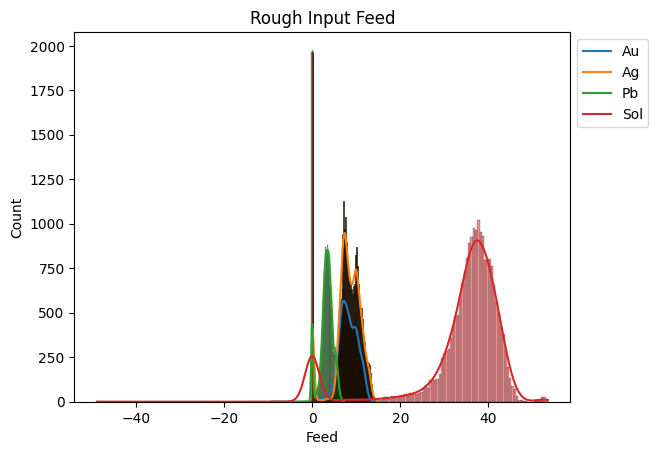

In [31]:
sns.histplot(data=au, 
             x='rougher.input.feed_au', 
             bins=100, 
             kde=True) 
sns.histplot(data=ag, 
             x='rougher.input.feed_ag', 
             kde=True) 
sns.histplot(data=pb, 
             x='rougher.input.feed_pb',  
             kde=True) 
sns.histplot(data=sol, 
             x='rougher.input.feed_sol',  
             kde=True) 

plt.title('Rough Input Feed') 
plt.xlabel('Feed') 
plt.legend(labels=['Au', 'Ag', 'Pb', 'Sol'], 
           loc='upper left', 
           bbox_to_anchor=(1, 1))

#### 3.1.2 Rougher Output Tail

In [32]:
display(au['rougher.output.tail_au'].describe(), 
        ag['rougher.output.tail_ag'].describe(), 
        pb['rougher.output.tail_pb'].describe(), 
        sol['rougher.output.tail_sol'].describe())

count    22716.000000
mean         2.348986
std          5.785634
min        -23.714867
25%          1.393801
50%          1.837124
75%          2.292090
max         83.336080
Name: rougher.output.tail_au, dtype: float64

count    22716.000000
mean         5.603418
std          4.602610
min        -54.222717
25%          4.775446
50%          5.750655
75%          6.430710
max         49.984450
Name: rougher.output.tail_ag, dtype: float64

count    22716.000000
mean         0.591831
std          0.316435
min         -0.004251
25%          0.425559
50%          0.589411
75%          0.762553
max          3.778064
Name: rougher.output.tail_pb, dtype: float64

count    22716.000000
mean        17.414028
std         28.385263
min       -113.228785
25%         15.005196
50%         17.783213
75%         19.992830
max        522.153447
Name: rougher.output.tail_sol, dtype: float64

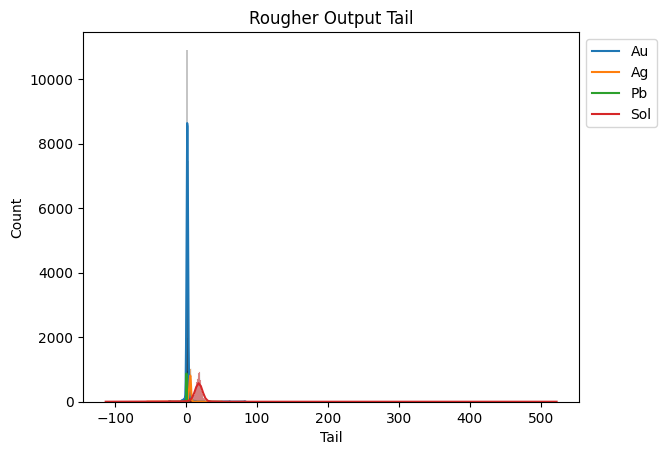

In [33]:
sns.histplot(data=au, 
             x='rougher.output.tail_au', 
             bins=100, 
             kde=True) 
sns.histplot(data=ag, 
             x='rougher.output.tail_ag', 
             kde=True) 
sns.histplot(data=pb, 
             x='rougher.output.tail_pb',  
             kde=True) 
sns.histplot(data=sol, 
             x='rougher.output.tail_sol',  
             kde=True)

plt.title('Rougher Output Tail') 
plt.xlabel('Tail') 
plt.legend(labels=['Au', 'Ag', 'Pb', 'Sol'], 
           loc='upper left', 
           bbox_to_anchor=(1, 1))

#### 3.1.3 Rougher Output Concentrate

In [34]:
display(au['rougher.output.concentrate_au'].describe(), 
        ag['rougher.output.concentrate_ag'].describe(), 
        pb['rougher.output.concentrate_pb'].describe(), 
        sol['rougher.output.concentrate_sol'].describe())

count    22716.000000
mean        17.824113
std          6.848851
min         -0.110671
25%         17.890860
50%         19.994397
75%         21.561160
max         28.824507
Name: rougher.output.concentrate_au, dtype: float64

count    22716.000000
mean        10.841337
std          4.410795
min         -0.046948
25%         10.107218
50%         11.774115
75%         13.609712
max         24.480271
Name: rougher.output.concentrate_ag, dtype: float64

count    22716.000000
mean         6.881672
std          2.828186
min         -0.058111
25%          6.362451
50%          7.569116
75%          8.474131
max         18.394042
Name: rougher.output.concentrate_pb, dtype: float64

count    22716.000000
mean        25.975057
std         10.243122
min         -9.378457
25%         25.648110
50%         29.350156
75%         31.984342
max         40.089993
Name: rougher.output.concentrate_sol, dtype: float64

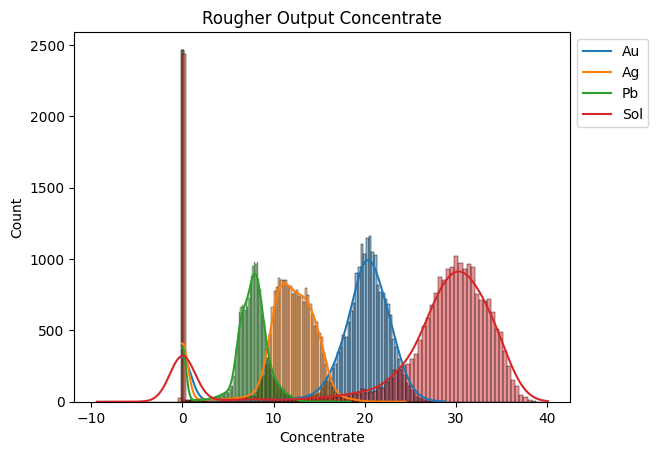

In [35]:
sns.histplot(data=au, 
             x='rougher.output.concentrate_au', 
             bins=100, 
             kde=True) 
sns.histplot(data=ag, 
             x='rougher.output.concentrate_ag', 
             kde=True) 
sns.histplot(data=pb, 
             x='rougher.output.concentrate_pb',  
             kde=True) 
sns.histplot(data=sol, 
             x='rougher.output.concentrate_sol',  
             kde=True)

plt.title('Rougher Output Concentrate') 
plt.xlabel('Concentrate') 
plt.legend(labels=['Au', 'Ag', 'Pb', 'Sol'], 
           loc='upper left', 
           bbox_to_anchor=(1, 1))

#### 3.1.4 Primary Cleaner Output Tail

In [36]:
display(au['primary_cleaner.output.tail_au'].describe(), 
        ag['primary_cleaner.output.tail_ag'].describe(), 
        pb['primary_cleaner.output.tail_pb'].describe(), 
        sol['primary_cleaner.output.tail_sol'].describe())

count    22716.000000
mean         3.659048
std          1.992397
min         -0.000058
25%          2.730154
50%          3.508599
75%          4.555554
max         18.528821
Name: primary_cleaner.output.tail_au, dtype: float64

count    22716.000000
mean        14.831291
std          5.701109
min         -0.000134
25%         13.440885
50%         15.588323
75%         17.919332
max         29.459575
Name: primary_cleaner.output.tail_ag, dtype: float64

count    22716.000000
mean         3.164164
std          1.659447
min         -0.906106
25%          2.258968
50%          3.147521
75%          4.118152
max          9.634565
Name: primary_cleaner.output.tail_pb, dtype: float64

count    22716.000000
mean         7.118465
std          3.160325
min         -3.878049
25%          5.839588
50%          7.833431
75%          9.326515
max         22.276364
Name: primary_cleaner.output.tail_sol, dtype: float64

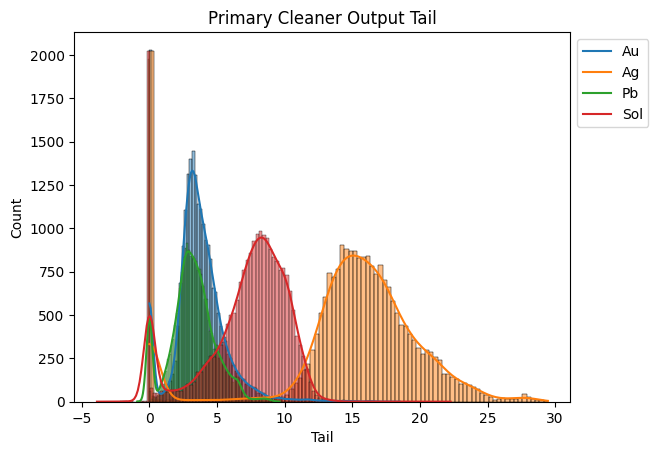

In [37]:
sns.histplot(data=au, 
             x='primary_cleaner.output.tail_au', 
             bins=100, 
             kde=True) 
sns.histplot(data=ag, 
             x='primary_cleaner.output.tail_ag', 
             kde=True) 
sns.histplot(data=pb, 
             x='primary_cleaner.output.tail_pb',  
             kde=True) 
sns.histplot(data=sol, 
             x='primary_cleaner.output.tail_sol',  
             kde=True)

plt.title('Primary Cleaner Output Tail') 
plt.xlabel('Tail') 
plt.legend(labels=['Au', 'Ag', 'Pb', 'Sol'], 
           loc='upper left', 
           bbox_to_anchor=(1, 1))

#### 3.1.5 Primary Cleaner Output Concentrate

In [38]:
display(au['primary_cleaner.output.concentrate_au'].describe(), 
        ag['primary_cleaner.output.concentrate_ag'].describe(), 
        pb['primary_cleaner.output.concentrate_pb'].describe(), 
        sol['primary_cleaner.output.concentrate_sol'].describe())

count    2.271600e+04
mean     2.911395e+01
std      1.065020e+01
min     -1.976506e-21
25%      2.933330e+01
50%      3.234401e+01
75%      3.476036e+01
max      4.593393e+01
Name: primary_cleaner.output.concentrate_au, dtype: float64

count    2.271600e+04
mean     7.665720e+00
std      3.134777e+00
min     -2.776486e-22
25%      6.755248e+00
50%      8.256022e+00
75%      9.690168e+00
max      1.608163e+01
Name: primary_cleaner.output.concentrate_ag, dtype: float64

count    22716.000000
mean         8.808130
std          3.787842
min         -4.503538
25%          7.621120
50%          9.875902
75%         11.231948
max         17.081278
Name: primary_cleaner.output.concentrate_pb, dtype: float64

count    22716.000000
mean         9.350248
std          4.928952
min        -22.569703
25%          6.658446
50%          9.683229
75%         13.069368
max         22.458114
Name: primary_cleaner.output.concentrate_sol, dtype: float64

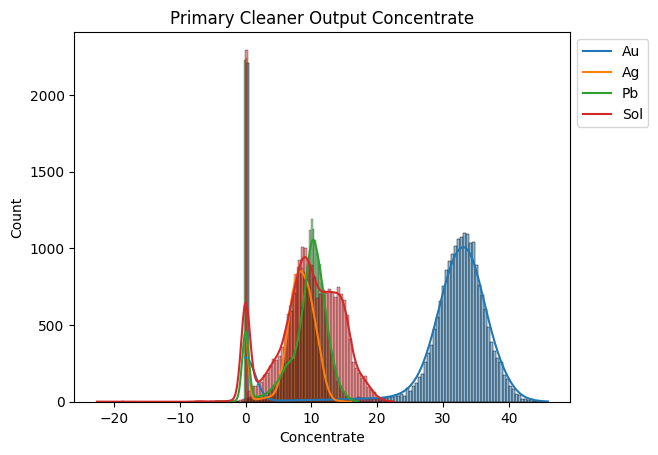

In [39]:
sns.histplot(data=au, 
             x='primary_cleaner.output.concentrate_au', 
             bins=100, 
             kde=True) 
sns.histplot(data=ag, 
             x='primary_cleaner.output.concentrate_ag', 
             kde=True) 
sns.histplot(data=pb, 
             x='primary_cleaner.output.concentrate_pb',  
             kde=True)
sns.histplot(data=sol, 
             x='primary_cleaner.output.concentrate_sol',  
             kde=True)

plt.title('Primary Cleaner Output Concentrate') 
plt.xlabel('Concentrate') 
plt.legend(labels=['Au', 'Ag', 'Pb', 'Sol'], 
           loc='upper left', 
           bbox_to_anchor=(1, 1))

#### 3.1.6 Secondary Cleaner Output Tail

In [40]:
display(au['secondary_cleaner.output.tail_au'].describe(), 
        ag['secondary_cleaner.output.tail_ag'].describe(), 
        pb['secondary_cleaner.output.tail_pb'].describe(), 
        sol['secondary_cleaner.output.tail_sol'].describe())

count    22716.000000
mean         4.027180
std          2.610033
min         -0.405167
25%          2.858971
50%          3.949003
75%          5.004235
max         26.811643
Name: secondary_cleaner.output.tail_au, dtype: float64

count    22716.000000
mean        13.334193
std          5.803383
min         -0.000102
25%         11.772471
50%         15.201377
75%         17.223427
max         23.264738
Name: secondary_cleaner.output.tail_ag, dtype: float64

count    22716.000000
mean         5.286823
std          3.099695
min         -0.000065
25%          3.433164
50%          5.059171
75%          7.576812
max         17.042505
Name: secondary_cleaner.output.tail_pb, dtype: float64

count    22716.000000
mean         5.784862
std          4.777172
min        -30.433492
25%          1.447532
50%          6.079347
75%          9.873083
max         33.058594
Name: secondary_cleaner.output.tail_sol, dtype: float64

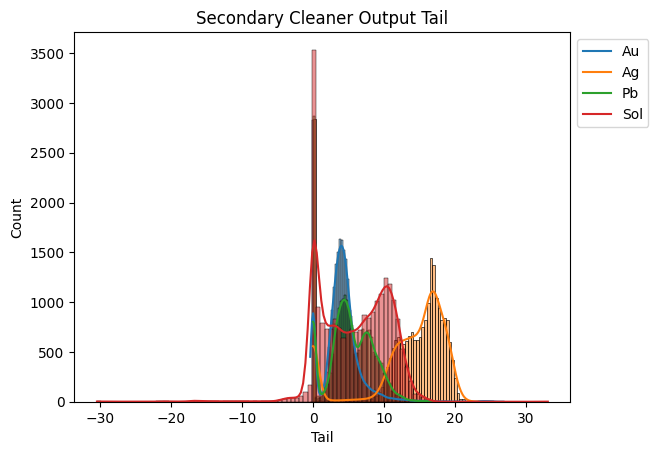

In [41]:
sns.histplot(data=au, 
             x='secondary_cleaner.output.tail_au', 
             bins=100, 
             kde=True) 
sns.histplot(data=ag, 
             x='secondary_cleaner.output.tail_ag', 
             kde=True) 
sns.histplot(data=pb, 
             x='secondary_cleaner.output.tail_pb',  
             kde=True)
sns.histplot(data=sol, 
             x='secondary_cleaner.output.tail_sol',  
             kde=True)

plt.title('Secondary Cleaner Output Tail') 
plt.xlabel('Tail') 
plt.legend(labels=['Au', 'Ag', 'Pb', 'Sol'], 
           loc='upper left', 
           bbox_to_anchor=(1, 1))

#### 3.1.7 Final Output Tail 

In [42]:
display(au['final.output.tail_au'].describe(), 
        ag['final.output.tail_ag'].describe(), 
        pb['final.output.tail_pb'].describe(), 
        sol['final.output.tail_sol'].describe())

count    22716.000000
mean         2.820032
std          1.268802
min          0.000000
25%          2.296666
50%          2.910328
75%          3.552452
max          9.789625
Name: final.output.tail_au, dtype: float64

count    22716.000000
mean         8.900911
std          3.541994
min         -0.253006
25%          7.668463
50%          9.476814
75%         11.083489
max         19.552149
Name: final.output.tail_ag, dtype: float64

count    22716.000000
mean         2.461767
std          1.227387
min         -3.880596
25%          1.780224
50%          2.643964
75%          3.282285
max          6.086532
Name: final.output.tail_pb, dtype: float64

count    22716.000000
mean         9.329342
std          4.705267
min        -40.705780
25%          8.049792
50%         10.173459
75%         11.839647
max         22.861749
Name: final.output.tail_sol, dtype: float64

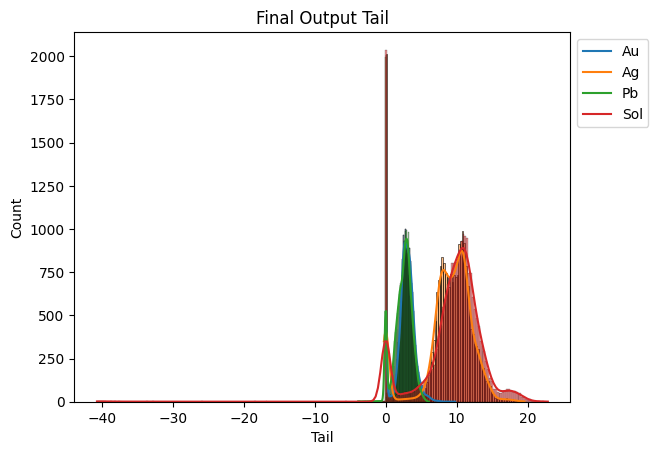

In [43]:
sns.histplot(data=au, 
             x='final.output.tail_au', 
             bins=100, 
             kde=True) 
sns.histplot(data=ag, 
             x='final.output.tail_ag', 
             kde=True) 
sns.histplot(data=pb, 
             x='final.output.tail_pb',  
             kde=True)
sns.histplot(data=sol, 
             x='final.output.tail_sol',  
             kde=True)

plt.title('Final Output Tail') 
plt.xlabel('Tail') 
plt.legend(labels=['Au', 'Ag', 'Pb', 'Sol'], 
           loc='upper left', 
           bbox_to_anchor=(1, 1))

#### 3.1.8 Final Output

In [44]:
display(au['final.output.concentrate_au'].describe(), 
        ag['final.output.concentrate_ag'].describe(), 
        pb['final.output.concentrate_pb'].describe(), 
        sol['final.output.concentrate_sol'].describe())

count    22716.000000
mean        39.891046
std         13.531513
min          0.000000
25%         42.349557
50%         44.638888
75%         46.106662
max         53.611374
Name: final.output.concentrate_au, dtype: float64

count    22716.000000
mean         4.768566
std          2.041309
min          0.000000
25%          4.011263
50%          4.949959
75%          5.857985
max         16.001945
Name: final.output.concentrate_ag, dtype: float64

count    22716.000000
mean         9.071393
std          3.257546
min          0.000000
25%          8.737171
50%          9.906979
75%         10.925942
max         17.031899
Name: final.output.concentrate_pb, dtype: float64

count    22716.000000
mean         8.548748
std          3.852780
min         -4.746872
25%          7.045267
50%          8.867609
75%         10.672752
max         19.615720
Name: final.output.concentrate_sol, dtype: float64

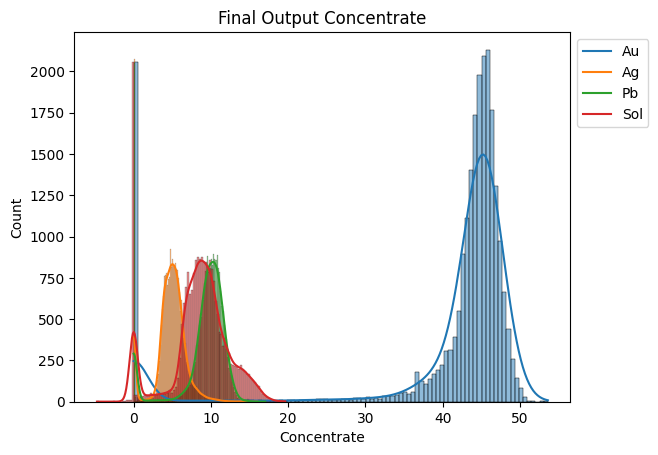

In [45]:
sns.histplot(data=au, 
             x='final.output.concentrate_au', 
             bins=100, 
             kde=True) 
sns.histplot(data=ag, 
             x='final.output.concentrate_ag', 
             kde=True) 
sns.histplot(data=pb, 
             x='final.output.concentrate_pb',  
             kde=True)
sns.histplot(data=sol, 
             x='final.output.concentrate_sol',  
             kde=True)

plt.title('Final Output Concentrate') 
plt.xlabel('Concentrate') 
plt.legend(labels=['Au', 'Ag', 'Pb', 'Sol'], 
           loc='upper left', 
           bbox_to_anchor=(1, 1))

### 3.2 Stage Comparison

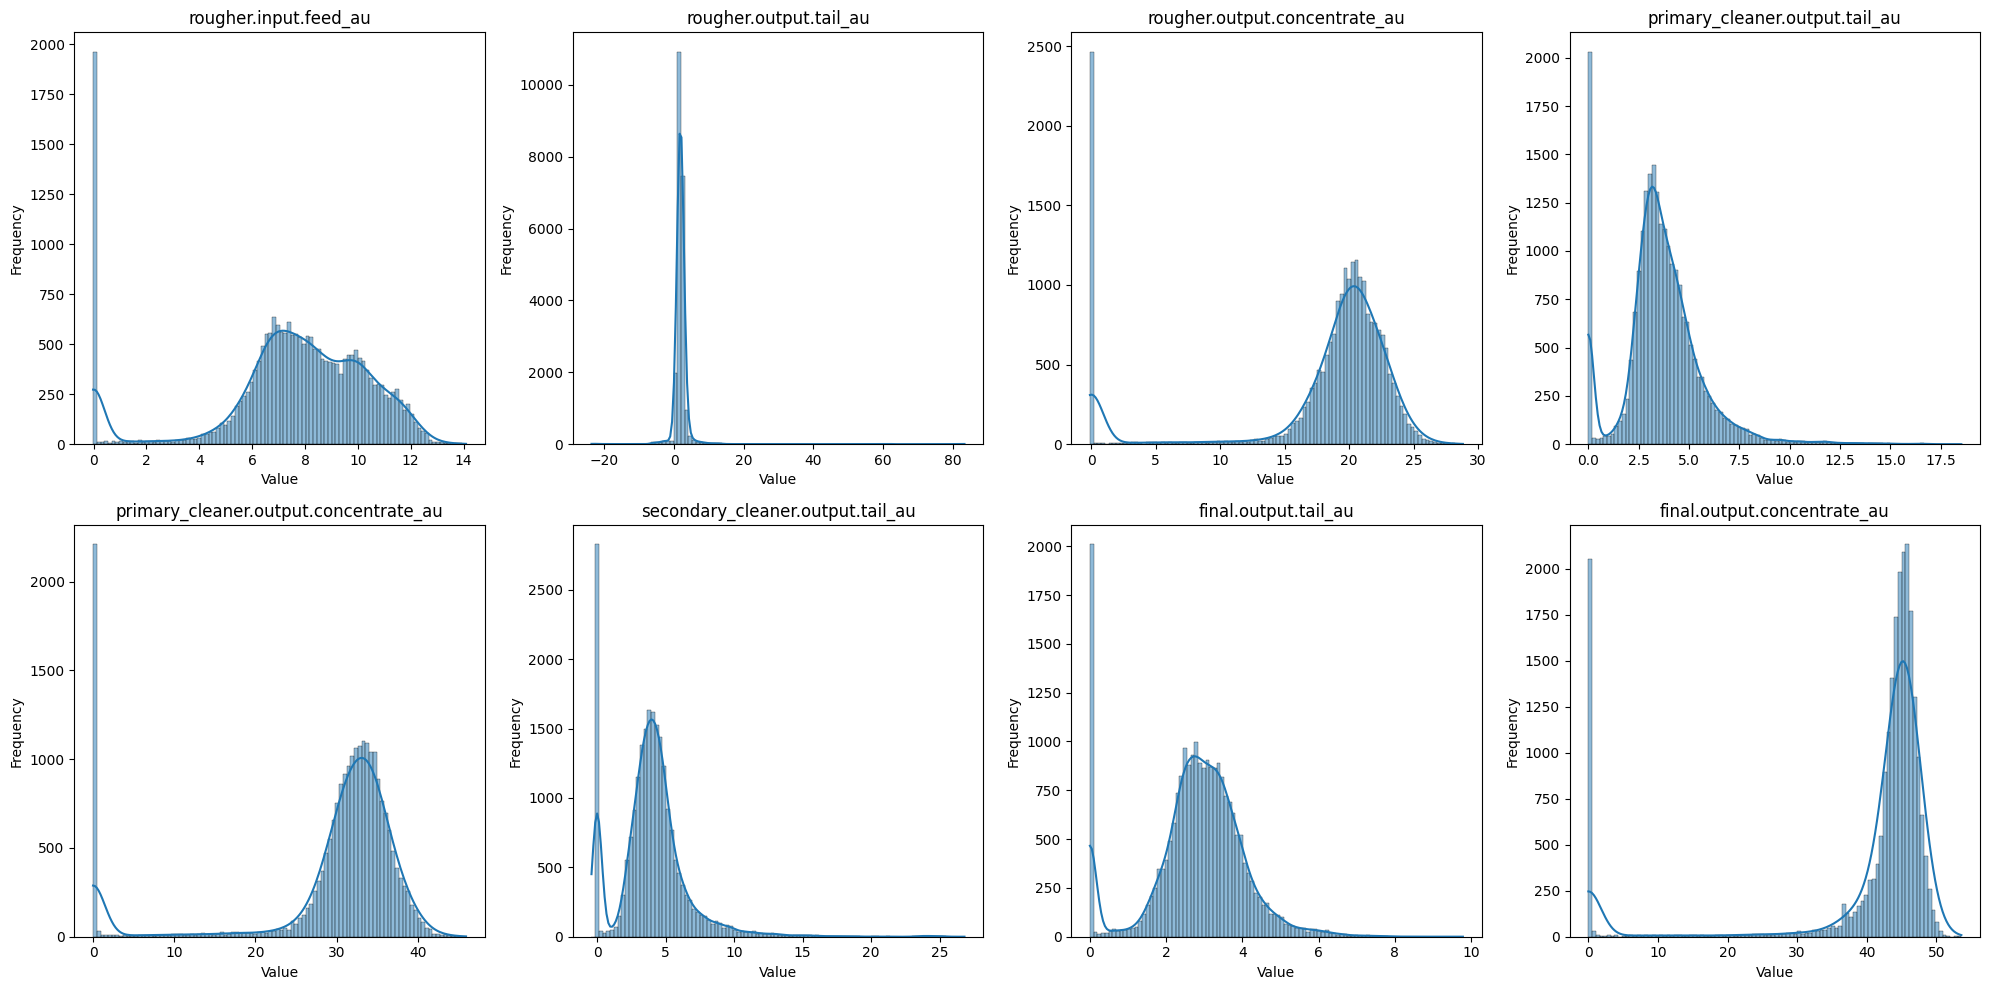

In [ ]:
# Example data for plotting
stages = ['rougher.input.feed_au', 'rougher.output.tail_au', 
          'rougher.output.concentrate_au', 'primary_cleaner.output.tail_au',
          'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_au',
          'final.output.tail_au', 'final.output.concentrate_au']

# Create a figure with subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each stage and plot its distribution
for i, stage in enumerate(stages):
    sns.histplot(data=full_df, 
                 x=stage, 
                 bins=100, 
                 kde=True, 
                 ax=axes[i])
    axes[i].set_title(stage)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

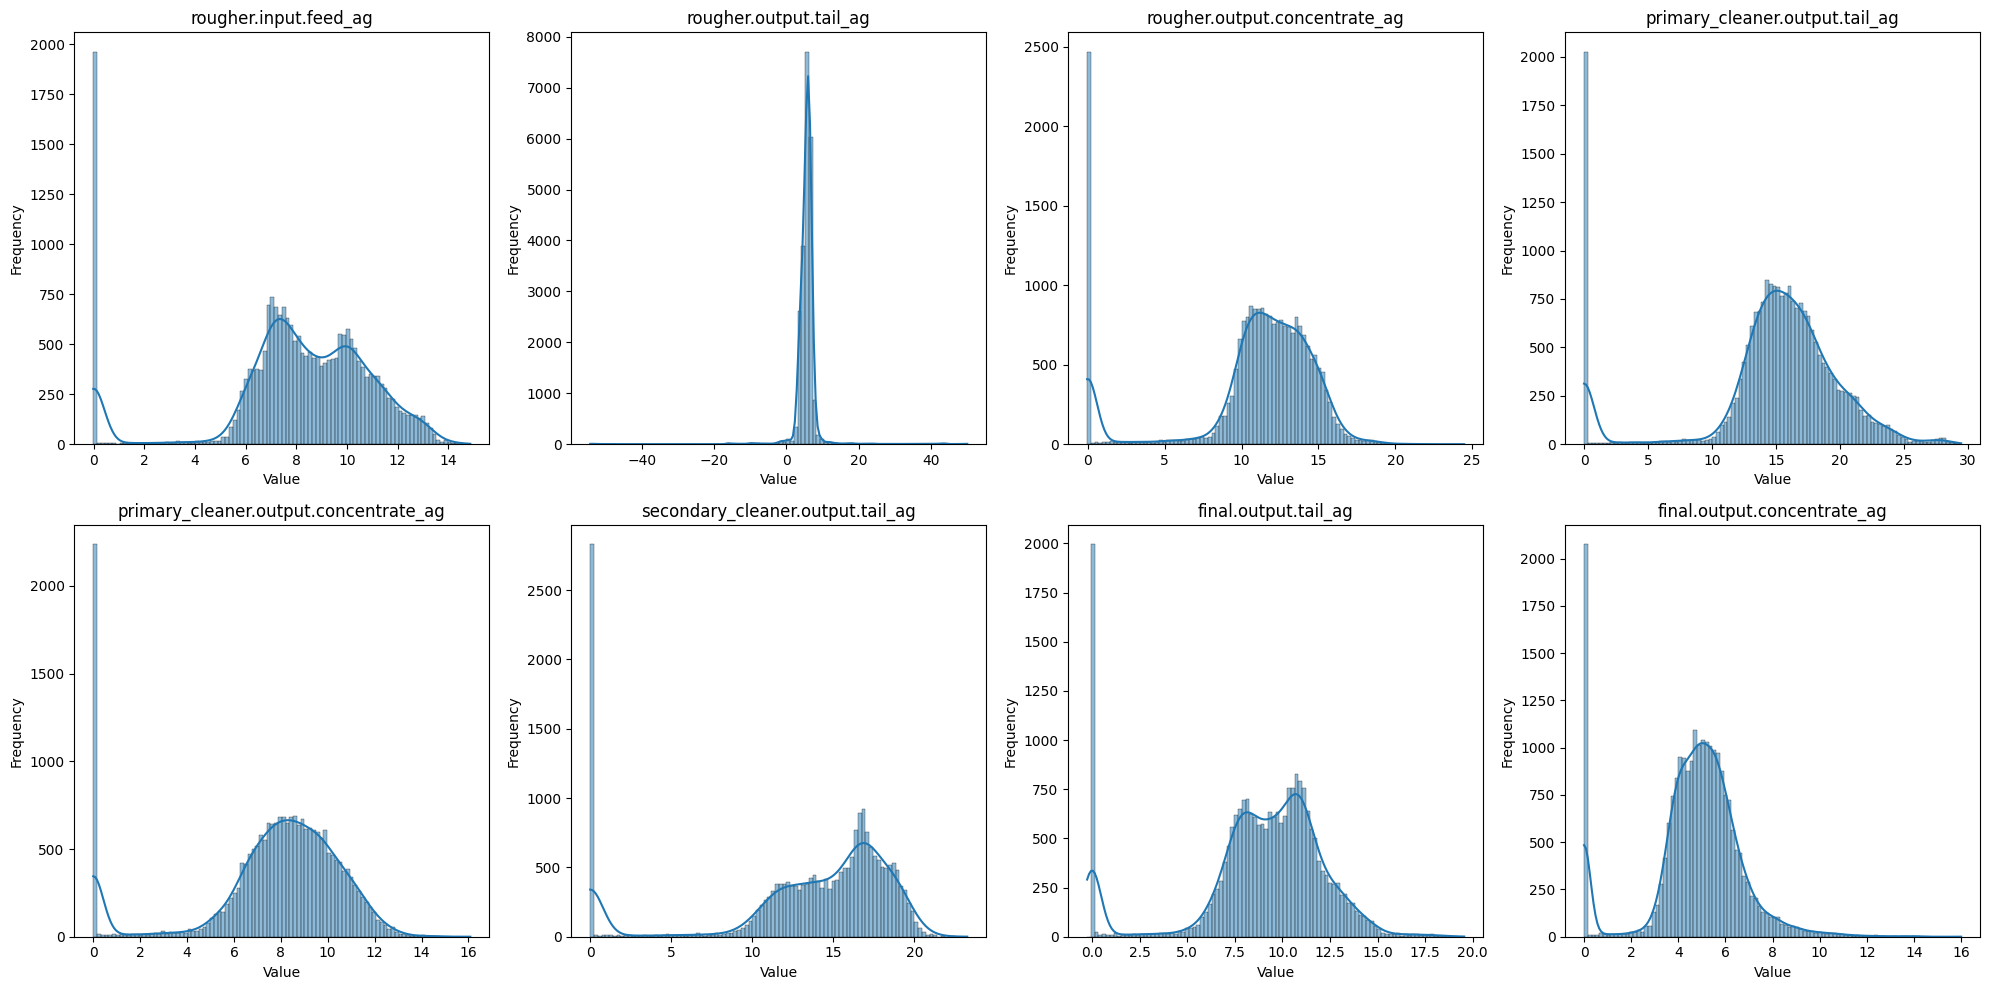

In [ ]:
# Example data for plotting
stages = ['rougher.input.feed_ag', 'rougher.output.tail_ag', 
          'rougher.output.concentrate_ag', 'primary_cleaner.output.tail_ag',
          'primary_cleaner.output.concentrate_ag', 'secondary_cleaner.output.tail_ag',
          'final.output.tail_ag', 'final.output.concentrate_ag']

# Create a figure with subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each stage and plot its distribution
for i, stage in enumerate(stages):
    sns.histplot(data=full_df, 
                 x=stage,
                   bins=100, 
                   kde=True, 
                   ax=axes[i])
    axes[i].set_title(stage)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

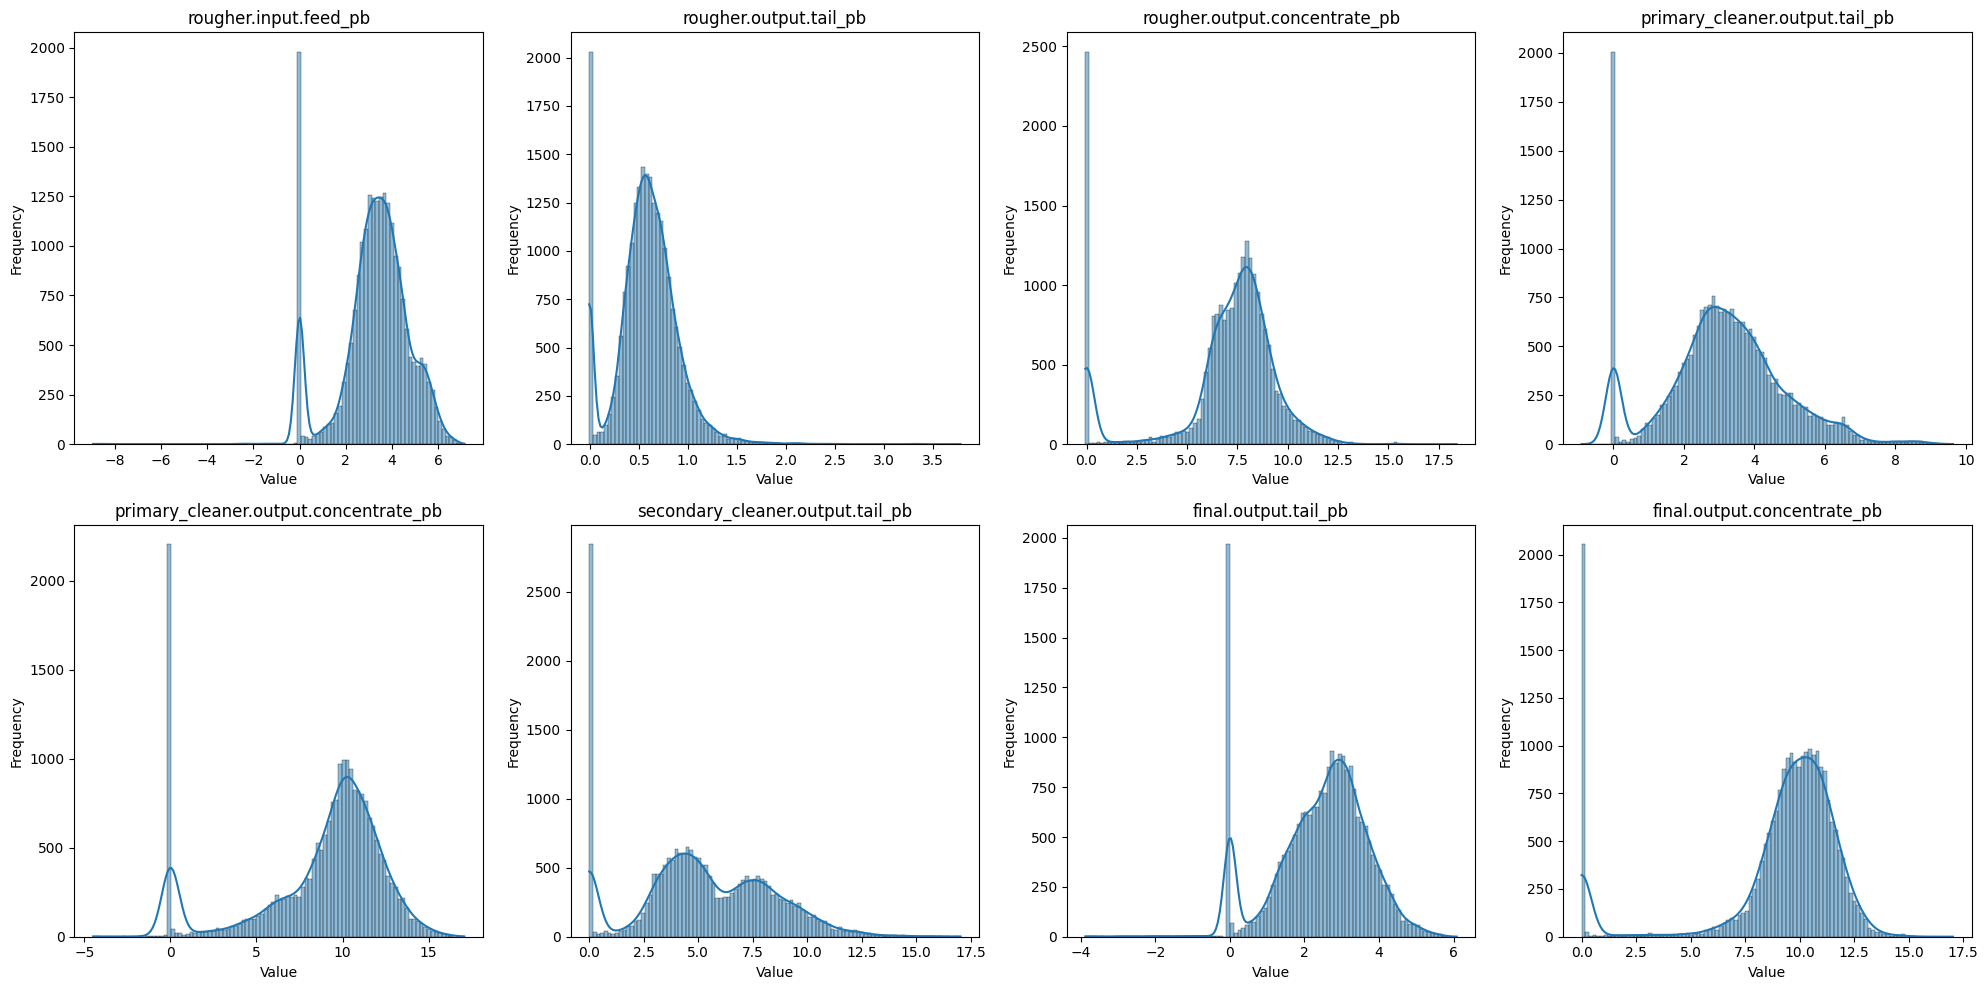

In [ ]:
# Example data for plotting
stages = ['rougher.input.feed_pb', 'rougher.output.tail_pb', 
          'rougher.output.concentrate_pb', 'primary_cleaner.output.tail_pb',
          'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_pb',
          'final.output.tail_pb', 'final.output.concentrate_pb']

# Create a figure with subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each stage and plot its distribution
for i, stage in enumerate(stages):
    sns.histplot(data=full_df, 
                 x=stage, 
                 bins=100, 
                 kde=True, 
                 ax=axes[i])
    axes[i].set_title(stage)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

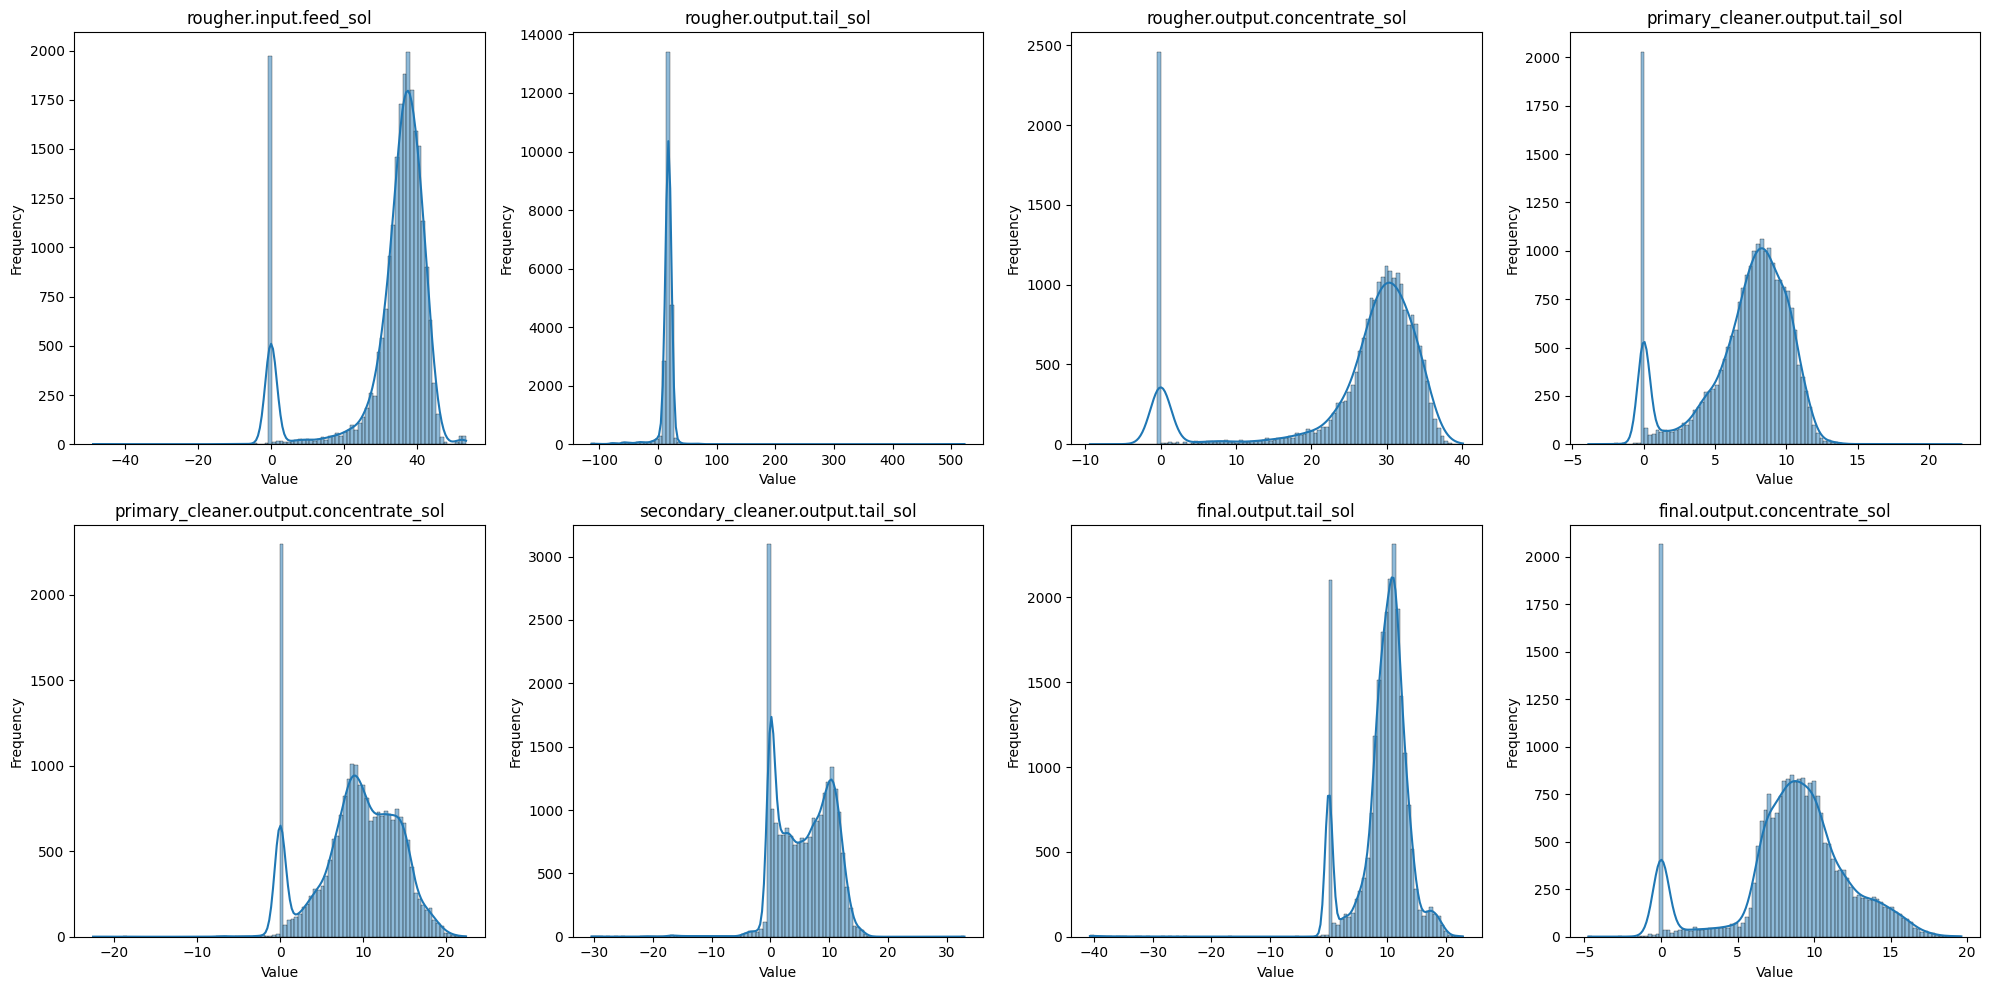

In [49]:
# Example data for plotting
stages = ['rougher.input.feed_sol', 'rougher.output.tail_sol', 
          'rougher.output.concentrate_sol', 'primary_cleaner.output.tail_sol',
          'primary_cleaner.output.concentrate_sol', 'secondary_cleaner.output.tail_sol',
          'final.output.tail_sol', 'final.output.concentrate_sol']

# Create a figure with subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each stage and plot its distribution
for i, stage in enumerate(stages):
    sns.histplot(data=full_df, x=stage, bins=100, kde=True, ax=axes[i])
    axes[i].set_title(stage)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### 3.3 Particle Size Comparison

In [50]:
train_feed = train_df.filter(like='feed').head() 
test_feed = test_df.filter(like='feed').head()

In [51]:
display(train_feed, test_feed)

,primary_cleaner.input.feed_size,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au
0,7.25,3481.779053,3520.337158,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150
1,7.25,3498.370979,3489.981857,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583
2,7.25,3495.348910,3502.359819,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222
3,7.25,3498.578313,3499.162912,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189
4,7.25,3494.800771,3506.679315,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707


,primary_cleaner.input.feed_size,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au
0,8.080000,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103
1,8.080000,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977
2,7.786667,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332
3,7.640000,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597
4,7.530000,11.327427,4.767383,488.248117,63.315324,41.269161,11.290425
